# Stockpub: Data Exploration and Cleaning 

## Setup

In [1]:
# Notebook magic
%reload_ext autoreload
%autoreload 2
# %matplotlib inline

In [2]:
# to import from src directory
import sys
sys.path.insert(0, '../..')

In [4]:
# Imports
import pandas as pd
import pandas_profiling as pdp
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import altair as alt
from stockpup_make_dataset import cleanup_stockpup_data


In [5]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Load Data

In [6]:
# base_data_path = '/mnt/Development/My_Projects/fundamental_stock_analysis/data/'
# raw_data_path = 'raw/stockpup/csv/'
# interim_data_path = 'interim/stockpup/'

In [7]:
# raw_data = pd.read_csv(base_data_path + interim_data_path + 'all_raw_data.csv', na_filter=True, index_col=0)
raw_data = cleanup_stockpup_data()

## Add Features

In [8]:
# Year-Quarter
dates = raw_data['Quarter end'].str.split(pat='-', expand=True)
raw_data['Year'] = dates[0].astype(int)
raw_data['Month'] = dates[1].astype(int)
raw_data['Day'] = dates[2].astype(int)
raw_data['Period'] = dates[0] + '-' + dates[1]
raw_data.drop(['Quarter end'], axis=1, inplace=True)

In [9]:
# Label: 
tickers = list(set(raw_data['Ticker']))
df = pd.DataFrame()
for t in tickers:
    raw_comp_data = raw_data[raw_data['Ticker']==t].sort_values(by=['Year', 'Month'], ascending=False)
    raw_comp_data['Price change'] = raw_comp_data['Price'].pct_change(periods=-4).shift(4)
    raw_comp_data['Label']=raw_comp_data['Price change'] > 0
    # remove rows where price change==NaN
    raw_comp_data.dropna(subset=['Price change'], inplace=True)
    df = pd.concat([df,raw_comp_data])
raw_data = df

In [10]:
raw_data

,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,Preferred equity,...,Asset turnover,Free cash flow per share,Current ratio,Ticker,Year,Month,Day,Period,Price change,Label
4,450746404.0,450746404.0,1.000,1.961900e+10,5.840000e+09,1.022300e+10,2.225000e+09,9.396000e+09,0.000000e+00,0.0,...,0.48,0.35,2.6247,COV,2013,12,27,2013-12,0.436703,True
5,452402570.0,452402570.0,1.000,1.991800e+10,5.867000e+09,1.067600e+10,2.639000e+09,9.242000e+09,0.000000e+00,0.0,...,0.48,1.32,2.2232,COV,2013,9,27,2013-09,0.440106,True
6,459997845.0,459997845.0,1.000,2.021500e+10,6.212000e+09,1.054400e+10,2.459000e+09,9.671000e+09,0.000000e+00,0.0,...,0.54,0.98,2.5262,COV,2013,6,28,2013-06,0.370130,True
7,470474681.0,470474681.0,1.000,2.261000e+10,6.334000e+09,1.163400e+10,2.875000e+09,1.097600e+10,0.000000e+00,0.0,...,0.55,1.19,2.2031,COV,2013,3,29,2013-03,0.235461,True
8,472043220.0,472043220.0,1.000,2.204900e+10,5.995000e+09,1.121700e+10,2.483000e+09,1.083200e+10,0.000000e+00,0.0,...,0.55,0.01,2.4144,COV,2012,12,28,2012-12,0.238444,True
9,473388967.0,473388967.0,1.000,2.225700e+10,6.272000e+09,1.169200e+10,2.912000e+09,1.056500e+10,0.000000e+00,0.0,...,0.55,1.35,2.1538,COV,2012,9,28,2012-09,0.089402,True
10,480096760.0,480096760.0,1.000,2.211400e+10,6.258000e+09,1.140200e+10,2.596000e+09,1.071200e+10,0.000000e+00,0.0,...,0.57,1.24,2.4106,COV,2012,6,29,2012-06,0.099380,True
11,482278133.0,482278133.0,1.000,2.115400e+10,6.082000e+09,1.062300e+10,2.643000e+09,1.053100e+10,0.000000e+00,0.0,...,0.57,1.10,2.3012,COV,2012,3,30,2012-03,0.133441,True
12,483338786.0,483338786.0,1.000,2.058500e+10,6.030000e+09,1.034400e+10,2.412000e+09,1.024100e+10,0.000000e+00,0.0,...,0.57,0.28,2.5000,COV,2011,12,30,2011-12,0.150964,True
13,482427803.0,482427803.0,1.000,2.037400e+10,5.773000e+09,1.055700e+10,2.400000e+09,9.817000e+09,0.000000e+00,0.0,...,0.57,0.85,2.4054,COV,2011,9,30,2011-09,0.131552,True


## Explore Data

In [12]:
# pdp.ProfileReport(x)

## Normalize

In [13]:
columns = raw_data.columns.values
column_names_to_not_normalize = ['Quarter end','Ticker','Year','Month','Day','Period','Price change','Label' ]
column_names_to_normalize = [x for x in list(columns) if x not in column_names_to_not_normalize ]

In [14]:
raw_data[column_names_to_normalize] = raw_data[column_names_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

## Dimention Reduction

In [15]:
X = raw_data[column_names_to_normalize]
X = np.nan_to_num(X)

In [28]:
# tsne = TSNE(n_components=2).fit_transform(X)
tsne = PCA(n_components=2).fit(X)
print(tsne.explained_variance_ratio_) 
tsne = tsne.transform(X)

[0.27744219 0.22282737]


In [29]:
raw_data.shape, tsne.shape

((57251, 47), (57251, 2))

In [30]:
d = pd.DataFrame()

In [47]:
d['Ticker']=raw_data['Ticker']
d['Period']=raw_data['Period']
d['Price change']=abs(raw_data['Price change'])
d['Label']=raw_data['Label']

In [48]:
d['A'], d['B'] = tsne[:,0], tsne[:,1]

## Visualize

In [49]:
alt.data_transformers.enable('json') # to overcome 5000 rows limit

DataTransformerRegistry.enable('json')

In [50]:
# Date Dropdown
date_dropdown = alt.binding_select(options=sorted(list(set(d['Period']))))
date_select = alt.selection_single(fields=['Period'], bind=date_dropdown, name='Period selection')

In [56]:
chart = alt.Chart(d, width=600, height=600).mark_point(filled=True)
chart = chart.encode(x='A', y='B', color='Label', size='Price change', tooltip=['Ticker','Period'])
chart = chart.add_selection(date_select).transform_filter(date_select)

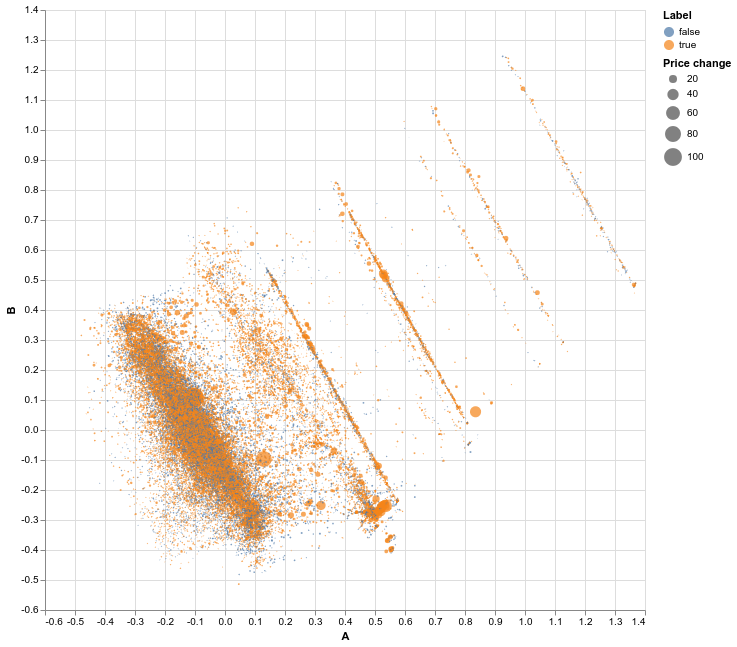

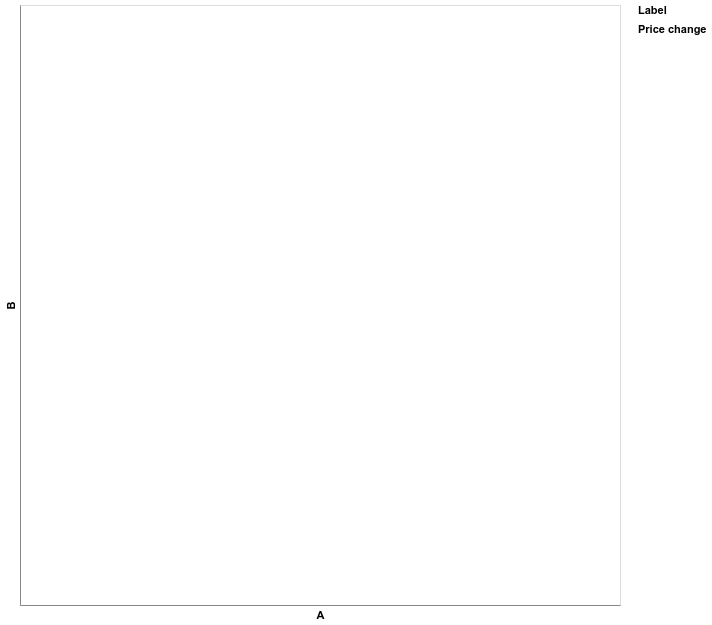

In [57]:
chart